Function: f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

1. Определить корни

In [1]:
from sympy import Interval, Symbol, solveset, solve, diff, simplify, plot, sin, cos, S

x = Symbol('x')
y = simplify(sin(x)/2+cos(x)/2)**2*sin(x)
y

sin(x)*sin(x + pi/4)**2/2

In [2]:
solveset(y, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

2. Найти интервалы, на которых функция возрастает

In [3]:
derivate = diff(y)
derivate

sin(x)*sin(x + pi/4)*cos(x + pi/4) + sin(x + pi/4)**2*cos(x)/2

In [4]:
segment = list(solveset(derivate, domain = Interval(-7,7)))
for i in range(len(segment)):
    segment[i] = segment[i].evalf(4)
segment = sorted(segment)
segment

[-6.557,
 -5.224,
 -3.927,
 -3.415,
 -2.082,
 -0.7854,
 -0.2737,
 1.059,
 2.356,
 2.868,
 4.201,
 5.498,
 6.009]

In [5]:
solve([x >= 0, x <= 6.009, y], x)


(x <= 6.009) & (0 <= x) & (Eq(x, 0) | Eq(x, pi) | Eq(x, 3*pi/4) | Eq(x, 7*pi/4))

In [6]:
section = list(solveset(derivate, x, Interval(0, 7, left_open=True, right_open=True)).evalf(n = 4))
section

[1.059, 2.356, 2.868, 4.201, 5.498, 6.009]

In [7]:
result = []
for i in range(0, len(section) - 1):
    result.append(((section[i], section[i + 1]), "Increasing function " if derivate.subs(x, (section[i] + section[i+1]) / 2).evalf(4) > 0 else "Decreasing function Decrease"))
result

[((1.059, 2.356), 'Decreasing function Decrease'),
 ((2.356, 2.868), 'Increasing function '),
 ((2.868, 4.201), 'Decreasing function Decrease'),
 ((4.201, 5.498), 'Increasing function '),
 ((5.498, 6.009), 'Decreasing function Decrease')]

4. Построить график

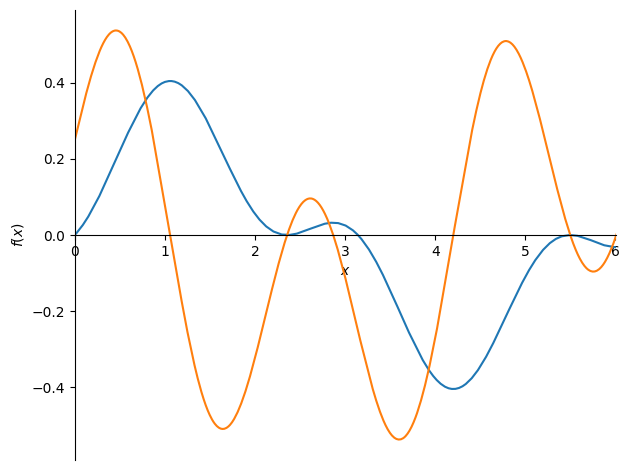

In [8]:
graph = plot(y, derivate, xlim=(0, 6.009))

5. Вычислить вершину

In [9]:
top_of_function = list(map(lambda z: (z, y.subs(x, z).evalf(4)), section))
top_of_function

[(1.059, 0.4041),
 (2.356, 1.578e-11),
 (2.868, 0.03240),
 (4.201, -0.4041),
 (5.498, -8.593e-11),
 (6.009, -0.03240)]

6. Определить промежутки, на котором f > 0

In [10]:
solveset(y > 0, x, S.Reals)

Union(Interval.open(0, 3*pi/4), Interval.open(3*pi/4, pi))

7. Определить промежутки, на котором f < 0

In [11]:
solveset(y < 0, x, S.Reals)

Union(Interval.open(pi, 7*pi/4), Interval.open(7*pi/4, 2*pi))